Importing the necessary libraries

In [ ]:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle


Reading the data from a csv file into a pandas dataframe

In [ ]:
heart = pd.read_csv('https://raw.githubusercontent.com/nicolerodriguez16/Heart-Failure-Classification/main/heart_failure_clinical_records_dataset%20(1).csv')

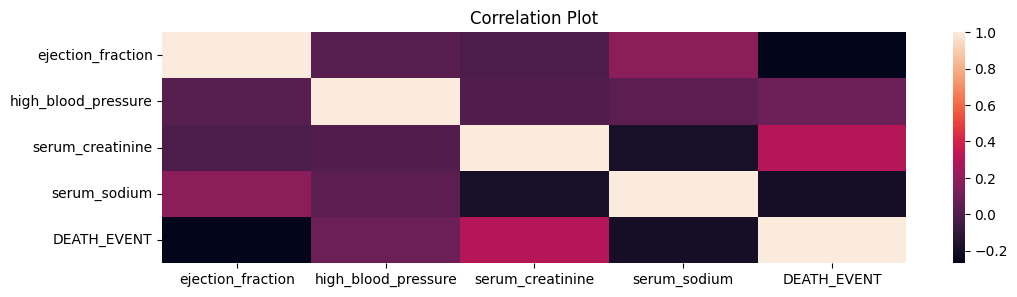

In [ ]:
corr_matrix = heart.iloc[:, 1:].corr()#to exclude the name as an attribite bc its a string
sns.heatmap(corr_matrix)
plt.title('Correlation Plot')
plt.show()

In [ ]:
corr_matrix

,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,DEATH_EVENT
ejection_fraction,1.000000,0.024445,-0.011302,0.175902,-0.268603
high_blood_pressure,0.024445,1.000000,-0.004935,0.037109,0.079351
serum_creatinine,-0.011302,-0.004935,1.000000,-0.189095,0.294278
serum_sodium,0.175902,0.037109,-0.189095,1.000000,-0.195204
DEATH_EVENT,-0.268603,0.079351,0.294278,-0.195204,1.000000


In [ ]:
heart.drop(columns=['time','age', 'creatinine_phosphokinase', 'diabetes', 'platelets', 'sex', 'smoking'], inplace=True)

In [ ]:
heart.head()

,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,DEATH_EVENT
0,0,20,1,1.9,130,1
1,0,38,0,1.1,136,1
2,0,20,0,1.3,129,1
3,1,20,0,1.9,137,1
4,1,20,0,2.7,116,1


In [ ]:
heart.shape

(299, 6)

In [ ]:
death_event_counts = heart["DEATH_EVENT"].value_counts()
print(death_event_counts)


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


Correlation Matrix = Visual 1

In [ ]:
heart['DEATH_EVENT'] = heart['DEATH_EVENT'].map({0: 'ALIVE', 1: 'DEAD'})#Adding a name to the 0-1 values of death event(our target variable)

In [ ]:
heart.head()

,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,DEATH_EVENT
0,0,20,1,1.9,130,DEAD
1,0,38,0,1.1,136,DEAD
2,0,20,0,1.3,129,DEAD
3,1,20,0,1.9,137,DEAD
4,1,20,0,2.7,116,DEAD


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anaemia              299 non-null    int64  
 1   ejection_fraction    299 non-null    int64  
 2   high_blood_pressure  299 non-null    int64  
 3   serum_creatinine     299 non-null    float64
 4   serum_sodium         299 non-null    int64  
 5   DEATH_EVENT          299 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 14.1+ KB


VISUAL 2 FOR PIE CHART SHOWING DEATH DISTRIBUTION

<Axes: title={'center': 'Pie Chart Showing Death Distribution'}, ylabel='count'>

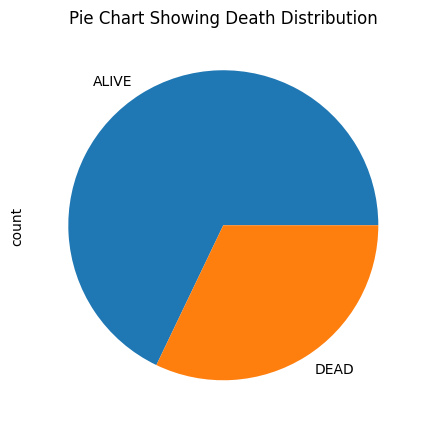

In [ ]:
data = heart.DEATH_EVENT.value_counts()
plt.figure(figsize = (5,10))
data.plot.pie(title='Pie Chart Showing Death Distribution')

In [ ]:
#.values is used to extract the dataframe values to a numpy array
X = heart[['anaemia', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium']].values

In [ ]:
y = heart[['DEATH_EVENT']].values

Splitting the Dataset into Training and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling to ensure proper classification techniques utilized
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold



from sklearn import svm

#knn classifieer added
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#random forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train, y_train)#had to remove ravel bc of error

#naives bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#svm+kernals

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train.ravel())

<ipython-input-241-a1946efe854c>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)#had to remove ravel bc of error


Performing 10-Fold Cross Validation for KNN


In [ ]:
k = 10#setting of 10 fold cv
kf = KFold(n_splits=k)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)#strtatified cross validation
#10cross validation
cv_result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
#stratified cross validation
scv_result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')
#Knn Classification report
y_pred_knn = knn.predict(X_test)#pred the test results
print(classification_report(y_test, y_pred_knn))

 Avg accuracy for 5-fold cross validation:0.7509523809523809 
 Avg accuracy for 5-fold stratified cross validation:0.7223809523809523
              precision    recall  f1-score   support

       ALIVE       0.76      0.87      0.81        62
        DEAD       0.58      0.39      0.47        28

    accuracy                           0.72        90
   macro avg       0.67      0.63      0.64        90
weighted avg       0.70      0.72      0.71        90



VISUAL 3 SHOWING THE K VALYE VS THE ACCURACY

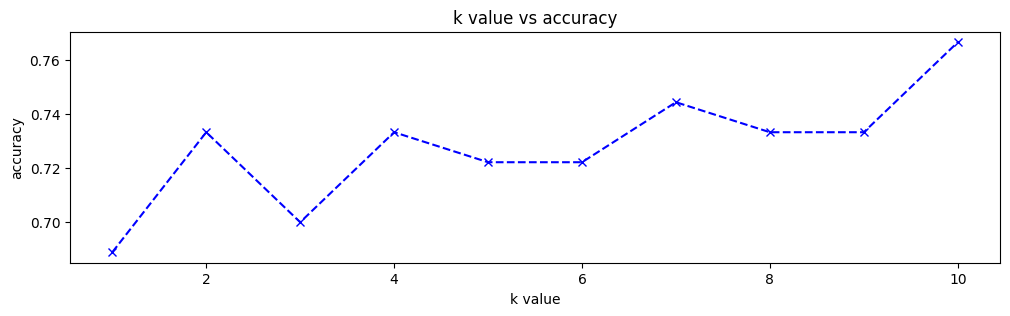

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

Performing 10-Fold Cross Validation for random forest

In [ ]:
cv_result = cross_val_score(rf, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
scv_result = cross_val_score(rf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#random forest classification report
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

 Avg accuracy for 5-fold cross validation:0.6938095238095239 
 Avg accuracy for 5-fold stratified cross validation:0.707857142857143
              precision    recall  f1-score   support

       ALIVE       0.76      0.85      0.80        62
        DEAD       0.55      0.39      0.46        28

    accuracy                           0.71        90
   macro avg       0.65      0.62      0.63        90
weighted avg       0.69      0.71      0.70        90



Performing 10-Fold Cross Validation for deciscion tree

In [ ]:
#with help from lecture who cited:for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
cv_result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(dt, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#decision tree classification report
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

 Avg accuracy for 5-fold cross validation:0.6933333333333332 
 Avg accuracy for 5-fold stratified cross validation:0.7228571428571428
              precision    recall  f1-score   support

       ALIVE       0.74      0.69      0.72        62
        DEAD       0.41      0.46      0.43        28

    accuracy                           0.62        90
   macro avg       0.57      0.58      0.58        90
weighted avg       0.64      0.62      0.63        90



Performing 10-Fold Cross Validation for GNB


In [ ]:
cv_result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#naives bayes classification report
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

 Avg accuracy for 5-fold cross validation:0.7273809523809522 
 Avg accuracy for 5-fold stratified cross validation:0.7366666666666667
              precision    recall  f1-score   support

       ALIVE       0.75      0.97      0.85        62
        DEAD       0.80      0.29      0.42        28

    accuracy                           0.76        90
   macro avg       0.78      0.63      0.63        90
weighted avg       0.77      0.76      0.71        90



In [ ]:
# I HAVE CHOSEN GNB TO BE MY MODEL BC OF HIGH ACCURACY SO I CREATED IT INTO A PICKLE
# Save the trained model and the scaler to files
with open('model.pkl', 'wb') as f:
    pickle.dump(gnb, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

Performing 10-Fold Cross Validation for Linear SVM

In [ ]:
#with help from lecture who cited:for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
cv_result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(linear, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#linear svm classification report
svm_linear_pred = linear.predict(X_test)
print(classification_report(y_test, svm_linear_pred))

 Avg accuracy for 5-fold cross validation:0.7466666666666667 
 Avg accuracy for 5-fold stratified cross validation:0.736904761904762
              precision    recall  f1-score   support

       ALIVE       0.76      0.90      0.82        62
        DEAD       0.62      0.36      0.45        28

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90



Performing 10 Fold Cross Validation on a RBF SVM

In [ ]:
cv_result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(rbf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#rbf classification report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

 Avg accuracy for 5-fold cross validation:0.7271428571428571 
 Avg accuracy for 5-fold stratified cross validation:0.7371428571428572
              precision    recall  f1-score   support

       ALIVE       0.76      0.90      0.82        62
        DEAD       0.62      0.36      0.45        28

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90



*Performing* 10 fold Cross Validation on Poly SVM

In [ ]:
cv_result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(poly, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#poly svm classification report
svm_poly_pred = poly.predict(X_test)
print(classification_report(y_test, svm_poly_pred))

 Avg accuracy for 5-fold cross validation:0.7083333333333333 
 Avg accuracy for 5-fold stratified cross validation:0.6892857142857143
              precision    recall  f1-score   support

       ALIVE       0.73      0.95      0.83        62
        DEAD       0.67      0.21      0.32        28

    accuracy                           0.72        90
   macro avg       0.70      0.58      0.57        90
weighted avg       0.71      0.72      0.67        90



Performing 10 Fold Cross Validation on Sigmoid SVM

In [ ]:
#followed concepts from previous lectures in the class and you sourced: for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
cv_result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
scv_result = cross_val_score(sig, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
print(f' Avg accuracy for 10-fold cross validation:{cv_result.mean()} \n Avg accuracy for 5-fold stratified cross validation:{scv_result.mean()}')

#classification report for sig svm
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

 Avg accuracy for 5-fold cross validation:0.7607142857142857 
 Avg accuracy for 5-fold stratified cross validation:0.7464285714285713
              precision    recall  f1-score   support

       ALIVE       0.78      0.87      0.82        62
        DEAD       0.62      0.46      0.53        28

    accuracy                           0.74        90
   macro avg       0.70      0.67      0.68        90
weighted avg       0.73      0.74      0.73        90



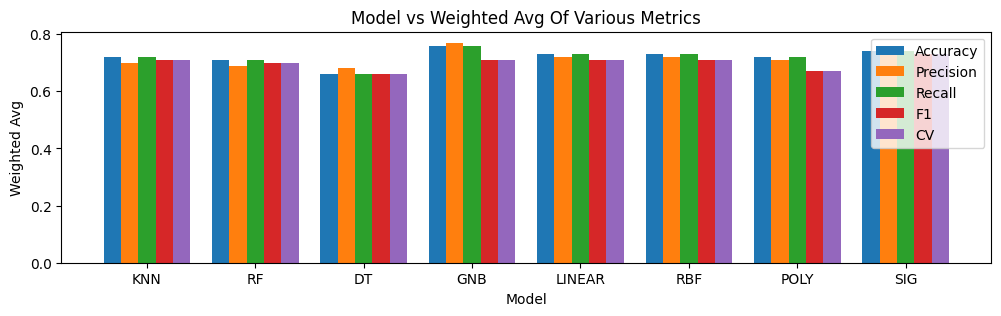

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'RF', 'DT', 'GNB', 'LINEAR', 'RBF', 'POLY', 'SIG']

# Collect this information from the classification reports and store them in lists
accuracy = [0.72, 0.71, 0.66, 0.76, 0.73, 0.73, 0.72, 0.74]
precision = [0.70,0.69, 0.68, 0.77, 0.72, 0.72, 0.71, 0.73]
recall = [0.72, 0.71, 0.66, 0.76, 0.73, 0.73, 0.72, 0.74]
f1 = [0.71, 0.70, 0.66, 0.71, 0.71, 0.71, 0.67, 0.73]
CV = [0.75, 0.69, 0.67, 0.73, 0.75, 0.73, 0.71, 0.76]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 5

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (12, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')
plt.bar(left_positions + bar_width * 4, f1, bar_width, label='CV')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()
